### Buisness Case

Purpose: to select the most popular video games available on the Steam platform
Stakeholder: the owner of the platform, who needs the results of research on the
popularity of specific video game genres

### Import Libs

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import DataFunctions as fc


### Notebook Options

In [34]:
# Set table to show all columns
pd.set_option('display.max_columns', None)

# Seaborn Settings

### Dataset Imports

In [35]:
# Read train dataset 
df = pd.read_csv('CSV\game_data_all.csv')

### Data Check & Inspection

In [36]:
df.head()

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29


In [37]:
fc.stats(df)

### Shape ###
Rows: 67571
Columns: 20


### Data Types ###
Unnamed: 0                 int64
game                      object
link                      object
release                   object
peak_players               int64
positive_reviews           int64
negative_reviews           int64
total_reviews              int64
rating                   float64
primary_genre             object
store_genres              object
publisher                 object
developer                 object
detected_technologies     object
store_asset_mod_time      object
review_percentage        float64
players_right_now         object
24_hour_peak              object
all_time_peak              int64
all_time_peak_date        object
dtype: object




In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

In [39]:
fc.miss_dupl(df)

### Missing Values ### 

primary_genre               10
store_genres                57
publisher                  461
developer                  128
detected_technologies     7306
store_asset_mod_time       296
review_percentage        19804
players_right_now            6
24_hour_peak                 6
all_time_peak_date           6
dtype: int64


### Duplicate Values ###
0


### Unique Values ###
318832


In [40]:
df.describe()

,Unnamed: 0,peak_players,positive_reviews,negative_reviews,total_reviews,rating,review_percentage,all_time_peak
count,67571.000000,6.757100e+04,6.757100e+04,67571.000000,6.757100e+04,67571.000000,47767.000000,6.757100e+04
mean,33785.000000,9.528674e+02,1.273527e+03,216.893801,1.490421e+03,65.288208,74.840497,9.629879e+02
std,19506.211857,1.979093e+04,2.955163e+04,5434.959528,3.400923e+04,14.059623,18.764257,2.017869e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,15.090000,0.000000,0.000000e+00
25%,16892.500000,3.000000e+00,5.000000e+00,1.000000,7.000000e+00,56.530000,64.000000,3.000000e+00
50%,33785.000000,7.000000e+00,1.900000e+01,6.000000,2.600000e+01,66.760000,79.000000,7.000000e+00
75%,50677.500000,4.600000e+01,9.900000e+01,29.000000,1.320000e+02,75.640000,90.000000,4.700000e+01
max,67570.000000,3.257248e+06,6.307931e+06,927317.000000,7.117776e+06,97.540000,100.000000,3.257248e+06


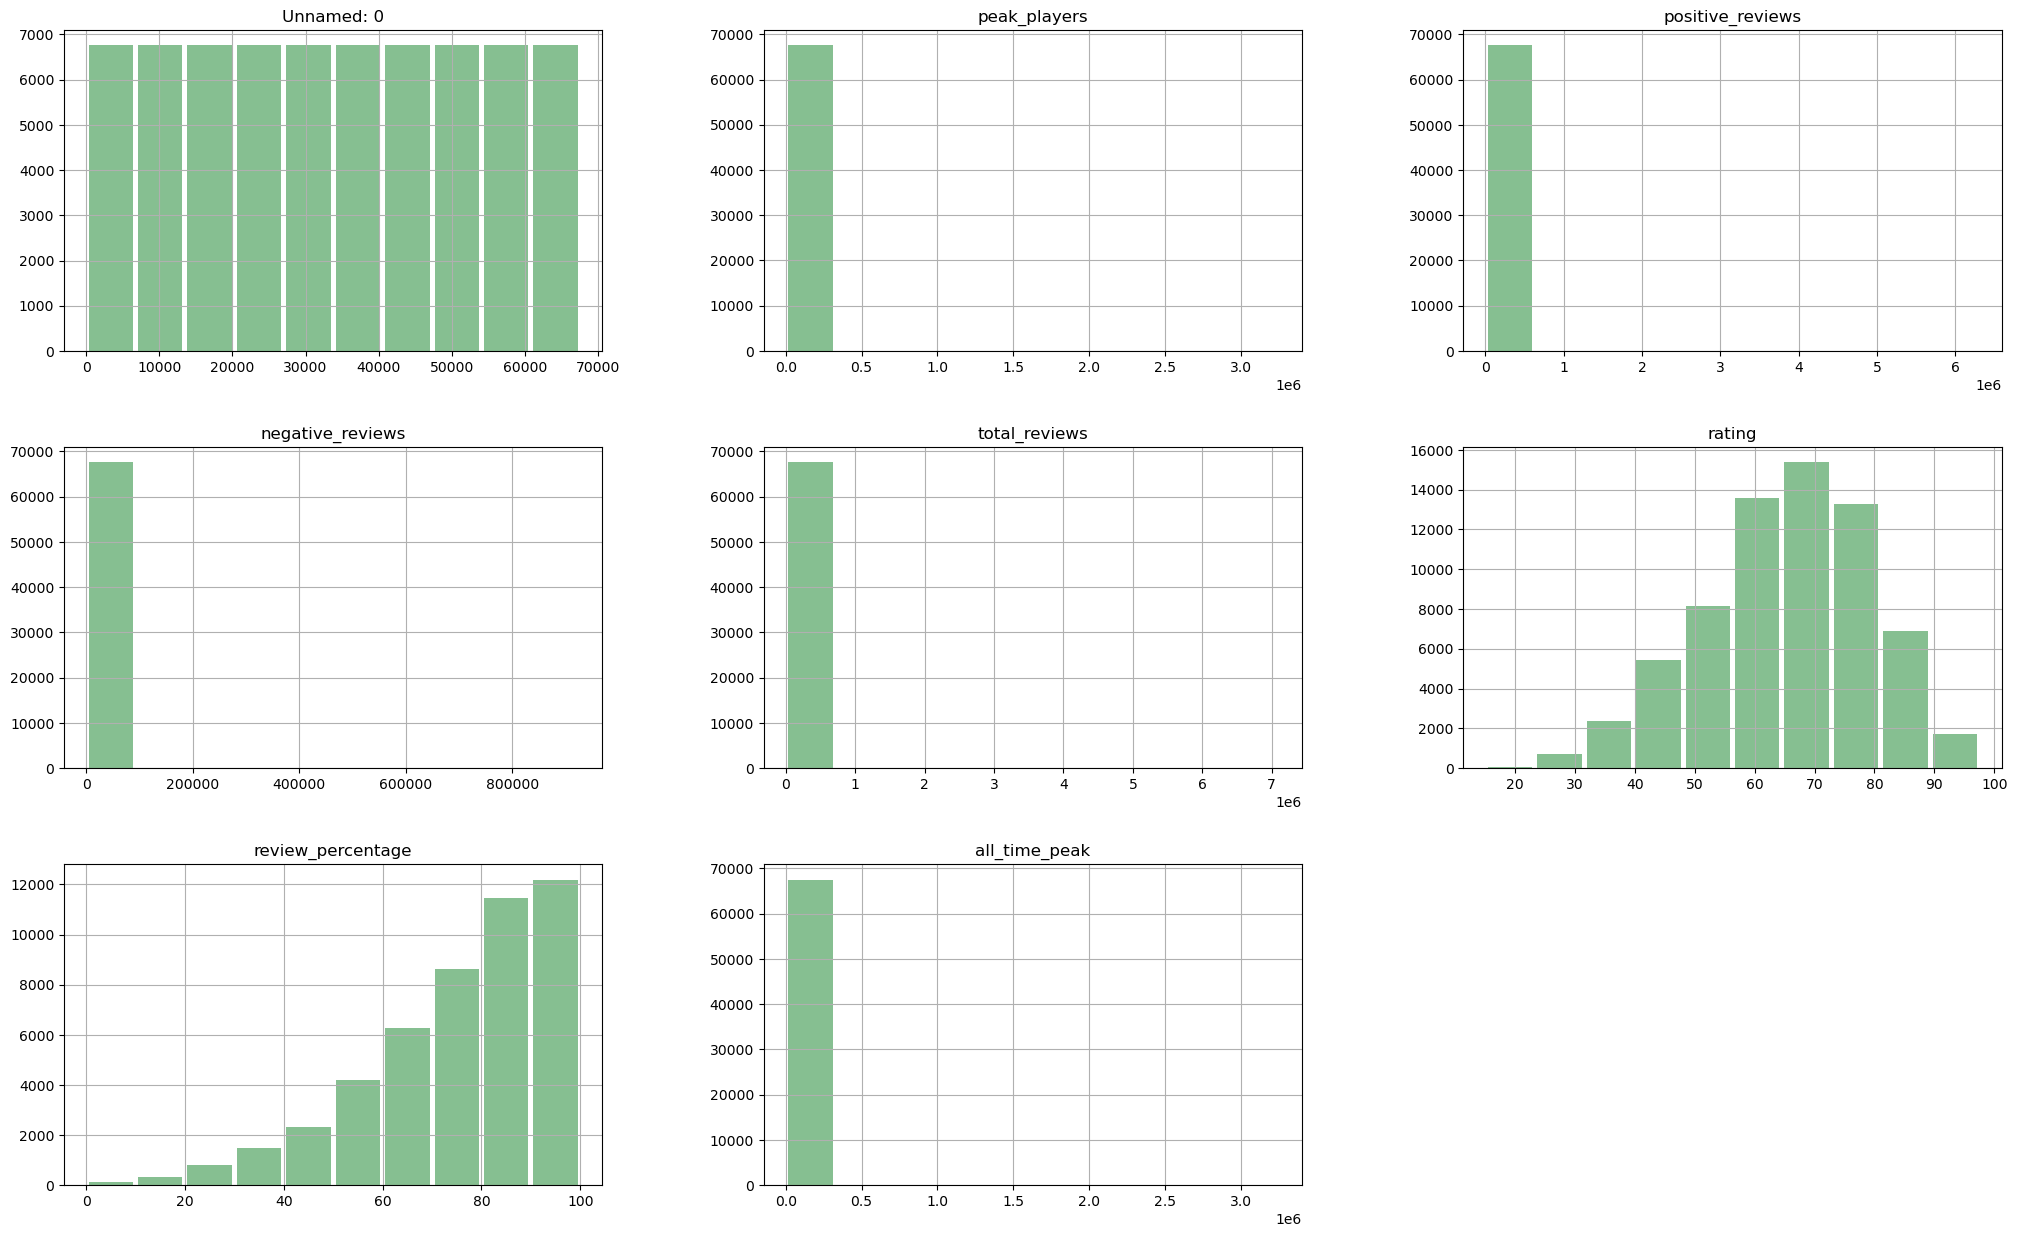

In [41]:
#Columns Distribution on Histograms
df.hist(figsize=(25,15), color='#86bf91', rwidth=0.9)
pass

#### Column Analysis

In [42]:
# Information about all columns
fc.col_analysis(df)

### Column: Unnamed: 0 -  Information ### 

count    67571.000000
mean     33785.000000
std      19506.211857
min          0.000000
25%      16892.500000
50%      33785.000000
75%      50677.500000
max      67570.000000
Name: Unnamed: 0, dtype: float64


### Column: game -  Information ### 

count     67571
unique    65948
top       Alone
freq         36
Name: game, dtype: object


### Column: link -  Information ### 

count             67571
unique            66427
top       /app/1835250/
freq                  6
Name: link, dtype: object


### Column: release -  Information ### 

count          67571
unique          4023
top       2023-03-31
freq             129
Name: release, dtype: object


### Column: peak_players -  Information ### 

count    6.757100e+04
mean     9.528674e+02
std      1.979093e+04
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      4.600000e+01
max      3.257248e+06
Name: peak_players, dtype: float64


### Column: positive_reviews -  Inform

Primary Genre (Gatunek podstawowy):

Analiza popularności gier wideo w oparciu o ich główny gatunek może dostarczyć informacji na temat preferencji użytkowników w kategorii gatunkowej.
Peak Players (Maksymalna liczba graczy):

Ta kolumna może dostarczyć informacji na temat popularności gier wideo, mierzonej przez maksymalną liczbę graczy, którzy grali w daną grę w danym czasie.
Positive Reviews (Pozytywne recenzje) i Negative Reviews (Negatywne recenzje):

Analiza stosunku pozytywnych do negatywnych recenzji może pomóc w określeniu popularności danej gry wideo.
Rating (Ocena):

Niektóre gry wideo mogą mieć ocenę przyznawaną przez użytkowników, co może być również użyteczne do analizy popularności.
Release (Data wydania):

Analiza popularności gier wideo w oparciu o datę ich wydania może pomóc w identyfikacji trendów w czasie.
Publisher (Wydawca) i Developer (Deweloper):

Informacje o wydawcy i deweloperze gry mogą być przydatne do analizy popularności gier stworzonych lub wydanych przez określonych producentów.
Detected Technologies (Wykryte technologie):

Niektóre gry wideo mogą korzystać z określonych technologii, co może mieć wpływ na ich popularność.
Review Percentage (Procent recenzji):

Kolumna ta może dostarczyć informacji o stosunku liczby recenzji do całkowitej liczby recenzji, co może być użyteczne do analizy popularności.

Analiza korelacji:

Skorzystaj z korelacji, aby zbadać związki między różnymi kolumnami. Możesz użyć metody .corr() na DataFrame w bibliotece Pandas, aby obliczyć korelację między różnymi zmiennymi.
Wizualizacja danych:

Stwórz wykresy, heatmapy lub inne wizualizacje danych, aby lepiej zrozumieć zależności między zmiennymi.
Analiza grupowania (clustering):

Wykorzystaj techniki grupowania, takie jak klasteryzacja K-means, aby zidentyfikować naturalne grupy w danych.

#### ToDo

1. Drop Unnamed, link, store_asset_mod_time, all_time_peak
2. Change to data type: release, all_time_peak_date

### Data Cleaning

In [43]:
# Copy of dataset
dfc = df.copy()

In [44]:
# Save dataset to new CSV file
dfc.to_csv('CSV\game_data_all_clean.csv')

#### Column Drops

In [45]:
# List of columns for drop
drop_col = ['Unnamed: 0', 'link', 'store_asset_mod_time', 'all_time_peak']

In [46]:
# Drop non need columns
dfc.drop(columns= drop_col, inplace=True)

In [47]:
dfc.head()

,game,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,review_percentage,players_right_now,24_hour_peak,all_time_peak_date
0,Pizza Tower,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,98.0,"3,101","3,606",2023-03-25
1,Resident Evil 4,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,97.0,"46,289","47,164",2023-03-25
2,The Murder of Sonic the Hedgehog,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,98.0,618,776,2023-03-31
3,Pineapple on pizza,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,98.0,101,101,2023-03-28
4,Hi-Fi RUSH,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,97.0,630,664,2023-01-29


In [48]:
# Chek if drop was successfully
assert all(col not in dfc.columns for col in drop_col), 'Failed to delete all columns.'

print('The columns were successfully deleted.')

The columns were successfully deleted.


#### Missing Values

In [49]:
# Information about duplicates and missing values
fc.miss_dupl(dfc)

### Missing Values ### 

primary_genre               10
store_genres                57
publisher                  461
developer                  128
detected_technologies     7306
review_percentage        19804
players_right_now            6
24_hour_peak                 6
all_time_peak_date           6
dtype: int64


### Duplicate Values ###
0


### Unique Values ###
177090


<Axes: >

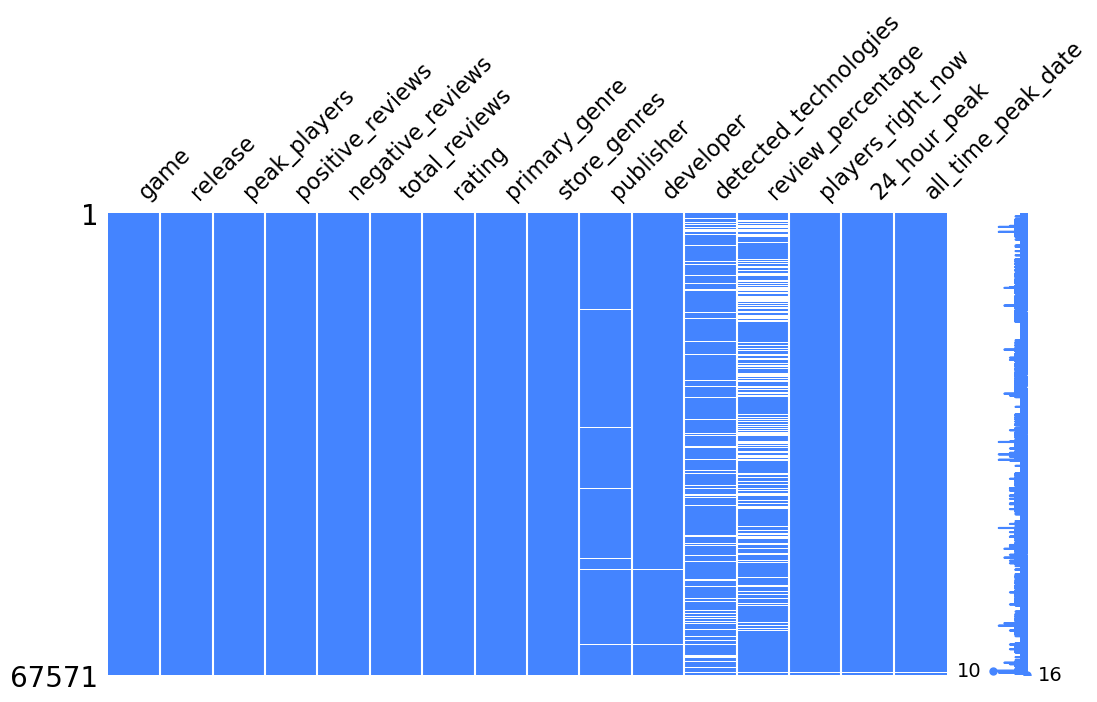

In [50]:
ms.matrix(dfc, figsize=(12, 6), color=(0.27, 0.52, 1.0))

<Axes: >

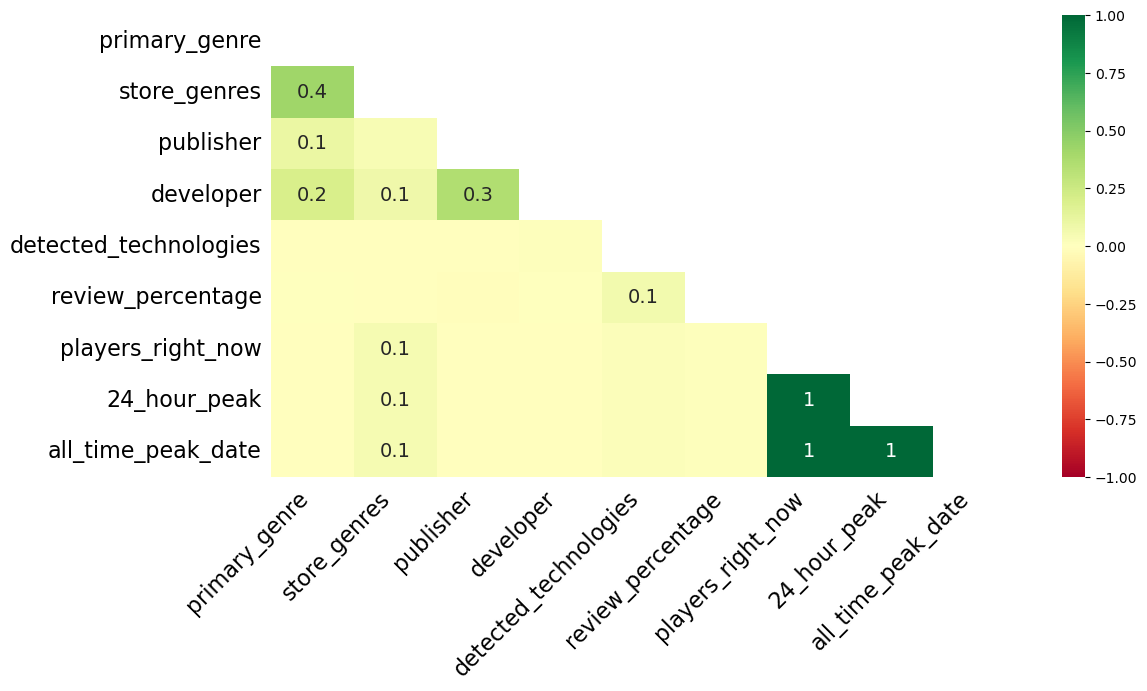

In [51]:
ms.heatmap(dfc, figsize=(12, 6), cmap="RdYlGn")

In [52]:
# Chcking missing values for each columns in %
fc.missing_perc(dfc)

### Missing Values % ### 

primary_genre             0.014799
store_genres              0.084356
publisher                 0.682245
developer                 0.189430
detected_technologies    10.812331
review_percentage        29.308431
players_right_now         0.008880
24_hour_peak              0.008880
all_time_peak_date        0.008880
dtype: float64


We can drop columns that have below 5 % of missing values